# Scipy

In [1]:
import scipy
import random

In [2]:
random.seed(42)

size1 = 200
xs1 = [random.gauss(20, 2) for _ in range(size1)]
size2 = 150
xs2 = [random.gauss(21, 2.5) for _ in range(size2)]

np.mean(xs1), np.mean(xs2)

(20.232259256634066, 21.10762206913608)

In [3]:
from scipy import stats

### t-test

In [4]:
stats.ttest_ind(xs1, xs2, equal_var=False)

Ttest_indResult(statistic=-3.2878271961194487, pvalue=0.0011606229545767118)

### normality test
- [D’Agostino, Ralph B.; Pearson, E. S. (1973). "Tests for Departure from Normality. Empirical Results for the Distributions of b2 and √b1".](https://www.jstor.org/stable/2335012)

In [5]:
np.random.seed(42)
random.seed(42)

print("normal distribution, xs1:", stats.normaltest(xs1)) # normal
print("negative xs1:            ", stats.normaltest(-np.array(xs1))) # normal
print("negative shifted xs1:    ", stats.normaltest(np.array(xs1) + 20000)) # normal
print("heavily transformed xs1: ", stats.normaltest(np.log(np.log(xs1)))) # not normal
print("uniform with numpy:      ", stats.normaltest(np.random.rand(100))) # uniform dist
print("uniform with random:     ", stats.normaltest([random.random() for _ in range(100)])) # uniform
print("uniform, small size:     ", stats.normaltest(np.random.rand(10)))
# why is normal? because size of sample was too small
print("uniform + normal:        ", stats.normaltest(np.array(xs1) + np.random.rand(len(xs1)))) # normal
print("uniform + normal:        ", stats.normaltest(np.array(xs1) + 100 * np.random.rand(len(xs1)))) # not normal
# why is not normal? because of big scale

normal distribution, xs1: NormaltestResult(statistic=0.4657530662981495, pvalue=0.7922513842695543)
negative xs1:             NormaltestResult(statistic=0.46575306629814905, pvalue=0.7922513842695547)
negative shifted xs1:     NormaltestResult(statistic=0.4657530663006104, pvalue=0.7922513842685796)
heavily transformed xs1:  NormaltestResult(statistic=9.406445771415097, pvalue=0.009066011248700255)
uniform with numpy:       NormaltestResult(statistic=49.42636430826334, pvalue=1.850126229274556e-11)
uniform with random:      NormaltestResult(statistic=35.343011283695375, pvalue=2.1152544278198162e-08)
uniform, small size:      NormaltestResult(statistic=0.664800594737011, pvalue=0.7172001720438599)
uniform + normal:         NormaltestResult(statistic=0.443537168097436, pvalue=0.8011007303730949)
uniform + normal:         NormaltestResult(statistic=121.984480243903, pvalue=3.246434732764683e-27)


/Users/jkpark/.pyenv/versions/3.7.6/envs/ml3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### non-parametric test
- [KS statistics](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): to check the similarity of non-parametric ditrubtions
- [Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test): to check the equality of variances

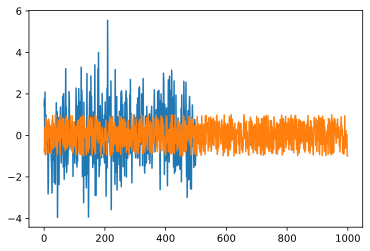

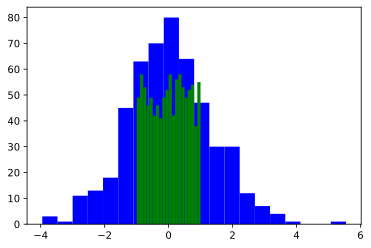

Ttest_indResult(statistic=0.5035070498197393, pvalue=0.6147943888636733)

In [6]:
import matplotlib.pyplot as plt

np.random.seed(42)
size = 500
xs1 = np.random.normal(-1, 1, size=size) + np.random.normal(1, 1, size=size)
xs2 = np.random.uniform(-1, 1, size=size*2)
plt.plot(xs1)
plt.plot(xs2)

plt.figure()
plt.hist(xs1, bins=20, color="b")
plt.hist(xs2, bins=20, color="g")
plt.show()

stats.ttest_ind(xs1, xs2, equal_var=False)
# it says that two dist are similar

In [7]:
stats.ks_2samp(xs1, xs2)
# but it says that two dist are different
# parametric test & non-parametric test should be done together

KstestResult(statistic=0.212, pvalue=1.517674874662589e-13)

In [8]:
# simple function to check if two distributions are similar
def distributions_similar(xs1, xs2, a=0.05):
    if stats.normaltest(xs1)[1] > a and stats.normaltest(xs2)[1] > a:
        equal_variances = stats.levene(xs1, xs2)[1] > a # check variance similar = levene test
        print("parametric, equal_variance: {}".format(equal_variances))
        test_res = stats.ttest_ind(xs1, xs2, equal_var=equal_variances)
    else:
        print("non-parametric")
        test_res = stats.ks_2samp(xs1, xs2)
    return test_res[1] > a

In [9]:
np.random.seed(42)
print(distributions_similar(xs1, xs2))
print(distributions_similar(np.random.rand(100), np.random.rand(50))) # uniform & uniform
print(distributions_similar(np.random.rand(100), np.random.normal(size=50))) # uniform & normal
print(distributions_similar(np.random.normal(size=100), np.random.normal(size=200))) # normal & normal
print(distributions_similar(np.random.normal(5, 3, 2000), np.random.normal(size=50))) # normal & normal & different params

non-parametric
False
non-parametric
True
non-parametric
False
parametric, equal_variance: True
True
parametric, equal_variance: False
False
